<a href="https://colab.research.google.com/github/farimaahchz/04-Global-CO2-Emissions/blob/main/Assignment_Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt


In [132]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [133]:
#importing dataframe and checking if it has been loaded properly
df = pd.read_csv('co2_emissions.csv')

# Print the multi-index DataFrame
print("Multi-index DataFrame:")
df


Multi-index DataFrame:


,Country,1990,2005,2017,2021
0,World,22674.116,30049.809,37077.404,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [134]:
#convert multi-index to non-multi-index by resetting the index
df_co2_emissions = df.reset_index(drop = True)

#renaming columns
df_co2_emissions.columns = ['Country', '1990', '2005', '2017', '2021']

#filter out the rows that aren't countries
df_co2_emissions = df[df_co2_emissions['Country'].str.contains("World|European Union") == False]

#checking if there is an empty values in the dataframe
df_co2_emissions.dropna()

print("co2_emissions")
df_co2_emissions

co2_emissions


,Country,1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


,Country,1990,2005,2017,2021
42,China,2397.048,6263.064,10877.218,12466.32
202,United States,5085.897,5971.571,5107.393,4752.08
93,India,605968.000,1210.754,2454.774,2648.78
158,Russia,2378.921,1733.950,1764.866,1942.54
102,Japan,1149.400,1276.863,1320.776,1084.69


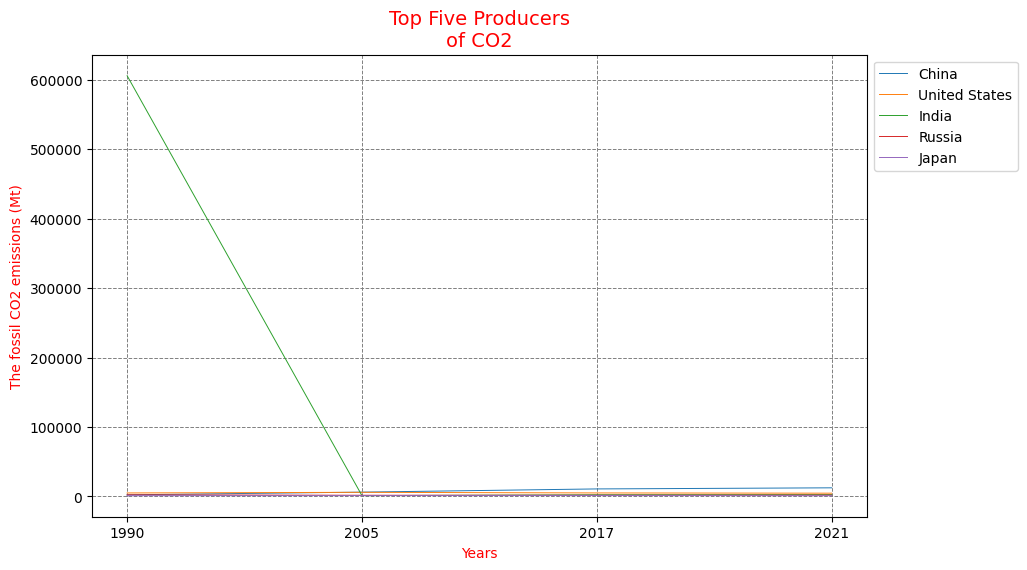

In [135]:
import numpy as np
#Graph 1: CO2 of the bigger countries

#finding the 5 biggest CO2 producers  (based on the latest measurement)
#using sort function to find the order and then pick the first 5 countries by using.head()
top_five_producers = (df_co2_emissions.sort_values('2021', ascending= False)).head(5)
top_five_producers
display(top_five_producers)

# x-axis, years of 1990, 2005, 2017 and 2021
years = ['1990', '2005', '2017', '2021']
#display(years)
# y-axis, the fossil CO2 emissions in Mt CO2 for the given years.
fossil_CO2_emissions = top_five_producers.loc[:, years]
#fossil_CO2_emissions

#graph
fig, ax = plt.subplots(figsize=(10, 6))

for i, country in top_five_producers.iterrows():
  ax.plot(years, country[years], label= country[0], linewidth= 0.7 )

ax.set_xlabel('Years', fontsize=10, color = 'red')
ax.set_ylabel('The fossil CO2 emissions (Mt)', fontsize=10, color= 'red')
ax.set_title('Top Five Producers\nof CO2', fontsize=14, color='red')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(linewidth= 0.7, linestyle='--', color = 'gray')

y_ticks = np.arange(0, top_five_producers[years].values.max(), 100000)
ax.set_yticks(y_ticks)

plt.show()


In [136]:
#Graph 2: worst and best changers

#calculate the relative change

relative_change = pd.DataFrame(df_co2_emissions.loc[:,'Country'])
for i in years:
    relative_change[i] = (df_co2_emissions.loc[:, i] / df_co2_emissions.loc[:,'1990']) * 100

relative_change


,Country,1990,2005,2017,2021
3,Afghanistan,100.0,41.751767,448.625295,327.965436
4,Albania,100.0,63.739936,76.348170,69.725049
5,Algeria,100.0,149.515051,243.508382,263.410326
6,Angola,100.0,273.030251,527.704666,417.877286
7,Anguilla,100.0,233.333333,466.666667,500.000000
...,...,...,...,...,...
207,Vietnam,100.0,491.680706,1083.782579,1592.557725
208,Western Sahara,100.0,157.638889,191.666667,166.666667
209,Yemen,100.0,316.073762,181.544940,174.967330
210,Zambia,100.0,83.147208,168.087986,237.225042


In [141]:
#finding the average to sort the data by using mean function, this way we have overall view each countries performance.
average_change = pd.DataFrame(relative_change.loc[:, years].mean(axis=1))
average_change.columns = ['average']
#display(average_change)
#adding the average to the relative change using concatenation
new_df = pd.concat([relative_change, average_change], axis=1)
new_df

#second option for adding the average coloumn by using the hint in the assignment
#relative_change['average'] = (relative_change.loc[:, '1990'] + relative_change.loc[:, '2005'] + relative_change.loc[:, '2017'] + relative_change.loc[:, '2021'])/4




,Country,1990,2005,2017,2021,average
3,Afghanistan,100.0,41.751767,448.625295,327.965436,229.585625
4,Albania,100.0,63.739936,76.348170,69.725049,77.453289
5,Algeria,100.0,149.515051,243.508382,263.410326,189.108440
6,Angola,100.0,273.030251,527.704666,417.877286,329.653051
7,Anguilla,100.0,233.333333,466.666667,500.000000,325.000000
...,...,...,...,...,...,...
207,Vietnam,100.0,491.680706,1083.782579,1592.557725,817.005252
208,Western Sahara,100.0,157.638889,191.666667,166.666667,153.993056
209,Yemen,100.0,316.073762,181.544940,174.967330,193.146508
210,Zambia,100.0,83.147208,168.087986,237.225042,147.115059


In [143]:
#usig the sorting and head and tail method to find the countries with the most and the least CO2 emission

print('worst_countries')
worst_countries = new_df.sort_values('average', ascending = False).head(3)
display(worst_countries)
print(worst_countries.loc[:, 'Country'])

print('best_countries')
best_countries = new_df.sort_values('average', ascending = False).tail(3)
display(best_countries)
print(best_countries.loc[:, 'Country'])


worst_countries


,Country,1990,2005,2017,2021,average
81,Greenland,100.0,21033.333333,17266.666667,15333.333333,13433.333333
62,Equatorial Guinea,100.0,3475.257732,2545.360825,7216.494845,3334.278351
109,Laos,100.0,491.943128,1335.545024,9744.075829,2917.890995


81             Greenland
62     Equatorial Guinea
109                 Laos
Name: Country, dtype: object
best_countries


,Country,1990,2005,2017,2021,average
76,Georgia,100.0,14.330119,33.265218,33.530004,45.281335
10,Armenia,100.0,21.943089,23.344123,32.706894,44.498526
93,India,100.0,0.199805,0.405100,0.437115,25.260505


76    Georgia
10    Armenia
93      India
Name: Country, dtype: object


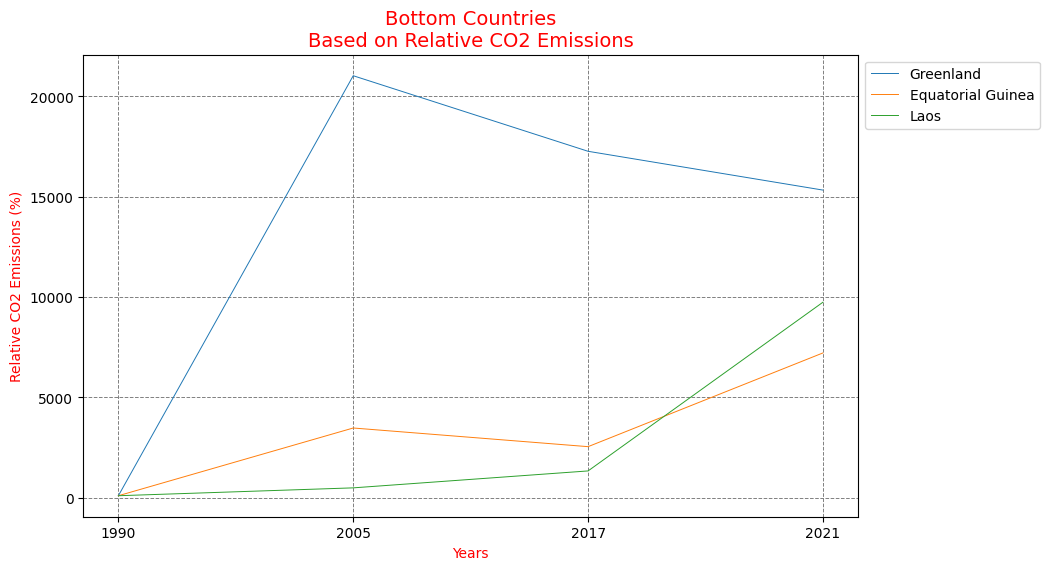

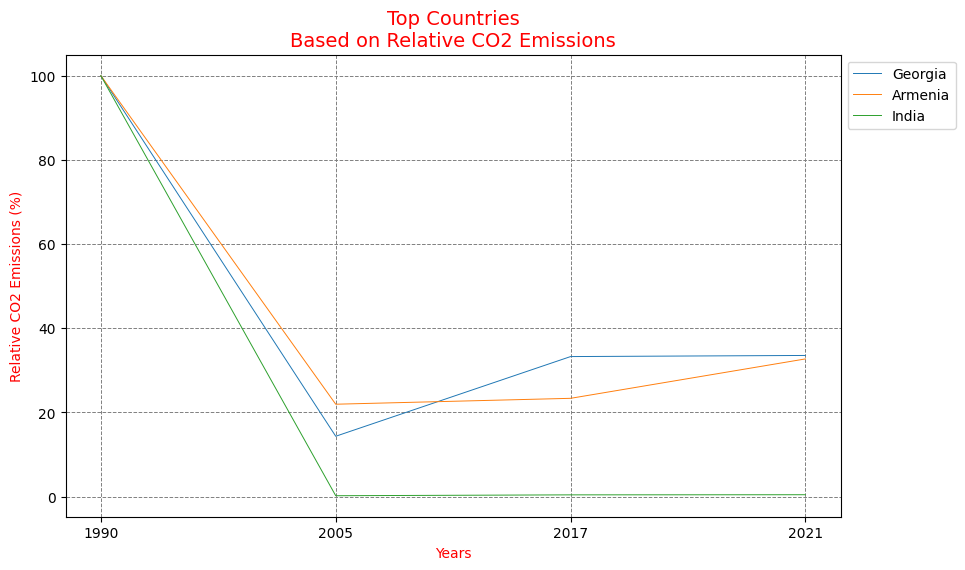

In [151]:
#making chart for top 3 and bottom 3

# x-axis, years of 1990, 2005, 2017 and 2021
#y-axis, relative_change

fig, ax1 = plt.subplots(figsize=(10, 6))
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot the worst three countries

for i, country in worst_countries.iterrows():
  ax1.plot(years, country[years], label= country[0], linewidth= 0.7 )

# Plot the worst three countries
for i, country in best_countries.iterrows():
  ax2.plot(years, country[years], label= country[0], linewidth= 0.7 )

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_xlabel('Years', fontsize=10, color= 'red')
ax1.set_ylabel('Relative CO2 Emissions (%)', fontsize=10, color= 'red')
ax1.set_title('Bottom Countries\nBased on Relative CO2 Emissions', fontsize=14, color='red')
ax1.grid(linewidth= 0.7, linestyle='--', color = 'gray')

ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Years', fontsize=10, color= 'red')
ax2.set_ylabel('Relative CO2 Emissions (%)', fontsize=10, color= 'red' )
ax2.set_title('Top Countries\nBased on Relative CO2 Emissions', fontsize=14, color='red')
ax2.grid(linewidth= 0.7, linestyle='--', color = 'gray')

plt.show()






In [162]:
#create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.
real_1990 =  pd.DataFrame(df_co2_emissions['1990'])
real_1990.columns = ['1990_real_value']
new_relative_ave = pd.concat([new_df, real_1990], axis=1)
#new_relative_ave
# Filter countries with at least 5 Mt of CO2 emissions in 1990
filtered_countries = new_relative_ave[new_relative_ave['1990_real_value'] >= 5]
#filtered_countries


#usig the sorting and head and tail method to find the countries with the most and the least CO2 emission

print('worst_countries_filtered')
worst_countries_filtered = filtered_countries.sort_values('average', ascending = False).head(3)
display(worst_countries_filtered)
print(worst_countries_filtered.loc[:, 'Country'])

print('best_countries_filtered')
best_countries_filtered = filtered_countries.sort_values('average', ascending = False).tail(3)
display(best_countries_filtered)
print(best_countries_filtered.loc[:, 'Country'])


worst_countries_filtered


,Country,1990,2005,2017,2021,average,1990_real_value
207,Vietnam,100.0,491.680706,1083.782579,1592.557725,817.005252,20.182
144,Oman,100.0,277.381353,659.887243,796.196567,458.366291,11.884
17,Bangladesh,100.0,280.025959,609.648111,770.623017,440.074272,13.868


207       Vietnam
144          Oman
17     Bangladesh
Name: Country, dtype: object
best_countries


,Country,1990,2005,2017,2021,average,1990_real_value
76,Georgia,100.0,14.330119,33.265218,33.530004,45.281335,34.745
10,Armenia,100.0,21.943089,23.344123,32.706894,44.498526,20.699
93,India,100.0,0.199805,0.405100,0.437115,25.260505,605968.000


76    Georgia
10    Armenia
93      India
Name: Country, dtype: object


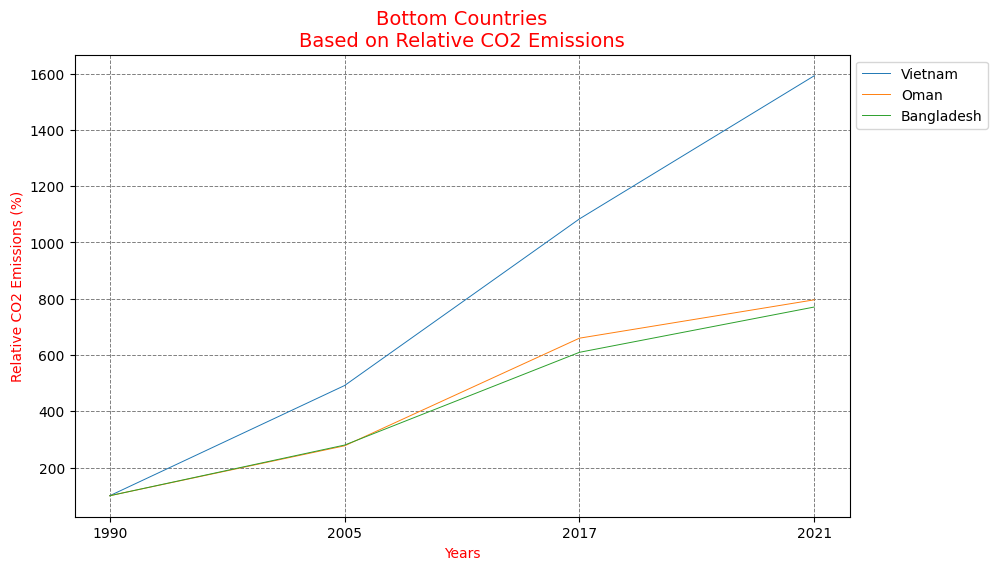

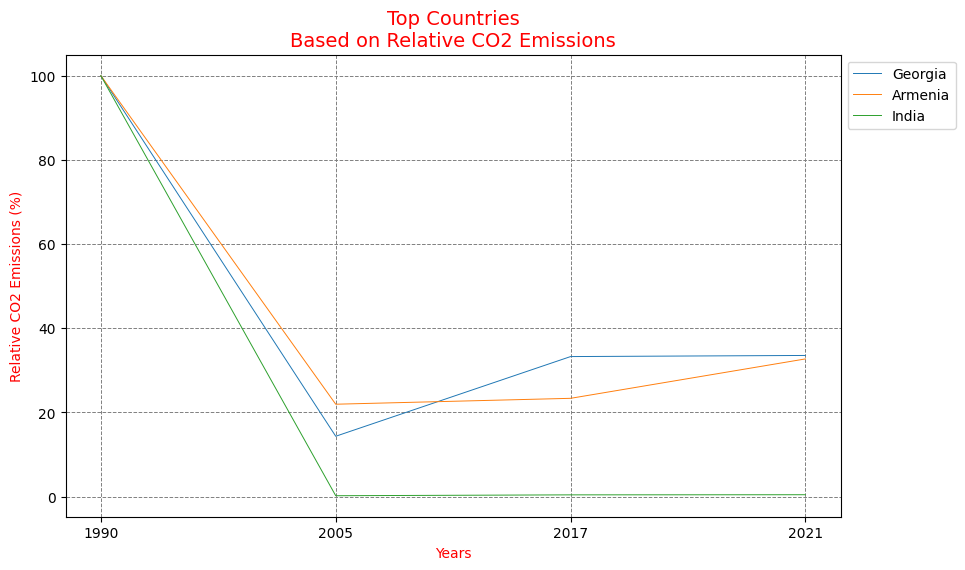

In [163]:
#making chart for filtered top 3 and bottom 3

# x-axis, years of 1990, 2005, 2017 and 2021
#y-axis, relative_change

fig, ax1 = plt.subplots(figsize=(10, 6))
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot the worst three countries

for i, country in worst_countries_filtered.iterrows():
  ax1.plot(years, country[years], label= country[0], linewidth= 0.7 )

# Plot the worst three countries
for i, country in best_countries_filtered.iterrows():
  ax2.plot(years, country[years], label= country[0], linewidth= 0.7 )

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_xlabel('Years', fontsize=10, color= 'red')
ax1.set_ylabel('Relative CO2 Emissions (%)', fontsize=10, color= 'red')
ax1.set_title('Bottom Countries\nBased on Relative CO2 Emissions', fontsize=14, color='red')
ax1.grid(linewidth= 0.7, linestyle='--', color = 'gray')

ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Years', fontsize=10, color= 'red')
ax2.set_ylabel('Relative CO2 Emissions (%)', fontsize=10, color= 'red' )
ax2.set_title('Top Countries\nBased on Relative CO2 Emissions', fontsize=14, color='red')
ax2.grid(linewidth= 0.7, linestyle='--', color = 'gray')

plt.show()


